In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [59]:
#data_file="uber_september14 data"
data1=pd.read_csv("uber-raw-data-sep14.csv")
data1.head(10)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


In [60]:
data1['Date/Time']=pd.to_datetime(data1['Date/Time'],format="%m/%d/%Y %H:%M:%S")
data1['dayofweek']=data1['Date/Time'].dt.dayofweek
data1["Day0fMonth"]=data1['Date/Time'].dt.day
data1["Dayname"]=data1["Date/Time"].dt.weekday_name
data1["Hours"]=data1["Date/Time"].dt.hour
data1.head()

,Date/Time,Lat,Lon,Base,dayofweek,Day0fMonth,Dayname,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,1,Monday,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,1,Monday,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,1,Monday,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,1,Monday,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,1,Monday,0


In [61]:
weekdays_pickup=data1.pivot_table(index=['dayofweek','Dayname'],aggfunc='count',values='Base')
weekdays_pickup

,,Base
dayofweek,Dayname,
0,Monday,137288
1,Tuesday,163230
2,Wednesday,135373
3,Thursday,153276
4,Friday,160380
5,Saturday,162057
6,Sunday,116532


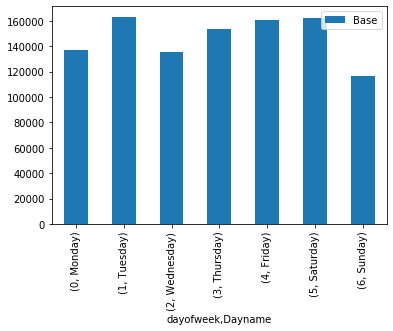

In [62]:
weekdays_pickup.plot(kind="bar")

In [63]:
weekdays_pickup.index.levels[1]

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='Dayname')

In [64]:
max1=weekdays_pickup['Base'].max(axis=0)
max1

163230

In [65]:
weekdays_pickup.loc[[(0,'Monday')]]

,,Base
dayofweek,Dayname,
0,Monday,137288


In [66]:
weekdays_pickup['Base']==max1

dayofweek  Dayname  
0          Monday       False
1          Tuesday       True
2          Wednesday    False
3          Thursday     False
4          Friday       False
5          Saturday     False
6          Sunday       False
Name: Base, dtype: bool

In [67]:
#printing the day which had highest pickups in an hour
sept14=weekdays_pickup[weekdays_pickup['Base']==max1]
print(sept14)
print(type(sept14))

                     Base
dayofweek Dayname        
1         Tuesday  163230
<class 'pandas.core.frame.DataFrame'>


                            Base
dayofweek Dayname               
0         Monday     4576.266667
1         Tuesday    5441.000000
2         Wednesday  4512.433333
3         Thursday   5109.200000
4         Friday     5346.000000
5         Saturday   5401.900000
6         Sunday     3884.400000


Text(0.5, 1.0, 'Weekday average (journey)')

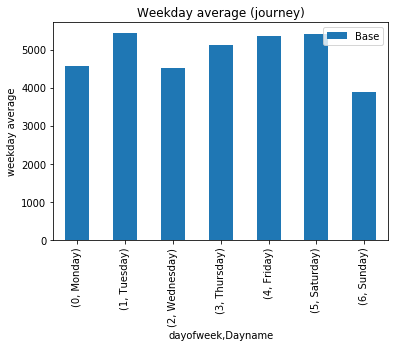

In [68]:
weekday=weekdays_pickup/30
print(weekday)
weekday.plot(kind="bar")
plt.ylabel('weekday average')
plt.title('Weekday average (journey)')

       Base
Hour       
0     24133
1     16107
2     10702
3     10789
4     12675


Text(0, 0.5, 'Range')

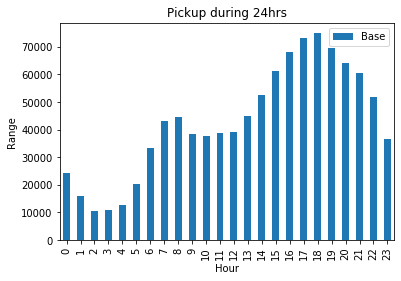

In [69]:
hours_work=data1.pivot_table(index=['Hour'],values='Base',aggfunc='count')
print(hours_work.head())
hours_work.plot(kind='bar')
plt.title('Pickup during 24hrs')
plt.ylabel('Range')

In [70]:
maxtime=hours_work['Base'].max()
hours_work[hours_work['Base']==maxtime]

,Base
Hour,
18,75040


In [31]:
apr_data=pd.read_csv('uber-raw-data-apr14.csv')
apr_data.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [36]:
apr_data['Date/Time']=pd.to_datetime(apr_data['Date/Time'],format='%m/%d/%Y %H:%M:%S')
apr_data['dayofweek']=apr_data['Date/Time'].dt.dayofweek
apr_data['Dayname']=apr_data["Date/Time"].dt.weekday_name
apr_data['Hours']=apr_data['Date/Time'].dt.hour
apr_data.head(5)

,Date/Time,Lat,Lon,Base,dayofweek,Dayname,Hours
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,0


In [37]:
weekdays_apr=apr_data.pivot_table(index=['dayofweek','Dayname'],values='Base',aggfunc='count')
weekdays_apr.head(5)

,,Base
dayofweek,Dayname,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303


In [39]:
apr_maxday=weekdays_apr[weekdays_apr['Base']==weekdays_apr['Base'].max()]
apr_maxday

,,Base
dayofweek,Dayname,
2,Wednesday,108631


Text(0.5, 1.0, 'Number of pickups during weekdays(April 2014)')

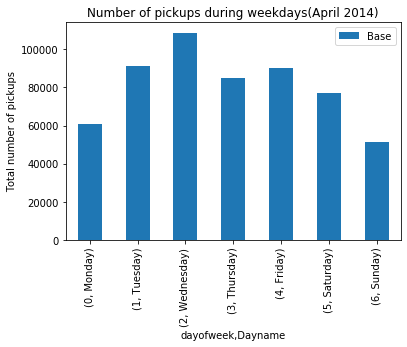

In [40]:
weekdays_apr.plot(kind='bar')
plt.ylabel('Total number of pickups')
plt.title('Number of pickups during weekdays(April 2014)')

In [41]:
may_data=pd.read_csv('uber-raw-data-may14.csv')
may_data.head(5)

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [42]:
may_data['Date/Time']=pd.to_datetime(may_data['Date/Time'],format='%m/%d/%Y %H:%M:%S')
may_data['dayofweek']=may_data['Date/Time'].dt.dayofweek
may_data['Dayname']=may_data["Date/Time"].dt.weekday_name
may_data['Hours']=may_data['Date/Time'].dt.hour
may_data.head(5)

,Date/Time,Lat,Lon,Base,dayofweek,Dayname,Hours
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,3,Thursday,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,3,Thursday,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,3,Thursday,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,3,Thursday,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,3,Thursday,0


In [43]:
weekdays_may=may_data.pivot_table(index=['dayofweek','Dayname'],values='Base',aggfunc='count')
weekdays_may.head(5)

,,Base
dayofweek,Dayname,
0,Monday,63846
1,Tuesday,76662
2,Wednesday,89857
3,Thursday,128921
4,Friday,133991


In [44]:
may_maxday=weekdays_may[weekdays_may['Base']==weekdays_may['Base'].max()]
may_maxday

,,Base
dayofweek,Dayname,
4,Friday,133991


Text(0.5, 1.0, 'Number of pickups during weekdays(May 2014)')

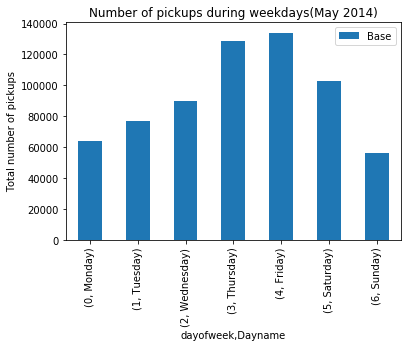

In [45]:
weekdays_may.plot(kind='bar')
plt.ylabel('Total number of pickups')
plt.title('Number of pickups during weekdays(May 2014)')

In [46]:
jun_data=pd.read_csv('uber-raw-data-jun14.csv')
jun_data.head(5)

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


            Date/Time      Lat      Lon    Base  dayofweek Dayname  Hours
0 2014-06-01 00:00:00  40.7293 -73.9920  B02512          6  Sunday      0
1 2014-06-01 00:01:00  40.7131 -74.0097  B02512          6  Sunday      0
2 2014-06-01 00:04:00  40.3461 -74.6610  B02512          6  Sunday      0
3 2014-06-01 00:04:00  40.7555 -73.9833  B02512          6  Sunday      0
4 2014-06-01 00:07:00  40.6880 -74.1831  B02512          6  Sunday      0
                       Base
dayofweek Dayname          
0         Monday      94655
1         Tuesday     88134
2         Wednesday   99654
3         Thursday   115325
4         Friday     105056
                      Base
dayofweek Dayname         
3         Thursday  115325


Text(0.5, 1.0, 'Number of pickups during weekdays(June 2014)')

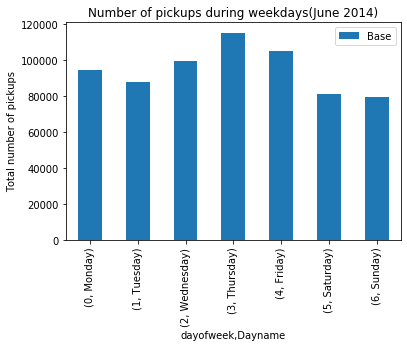

In [48]:
jun_data['Date/Time']=pd.to_datetime(jun_data['Date/Time'],format='%m/%d/%Y %H:%M:%S')
jun_data['dayofweek']=jun_data['Date/Time'].dt.dayofweek
jun_data['Dayname']=jun_data["Date/Time"].dt.weekday_name
jun_data['Hours']=jun_data['Date/Time'].dt.hour
print(jun_data.head(5))
weekdays_jun=jun_data.pivot_table(index=['dayofweek','Dayname'],values='Base',aggfunc='count')
print(weekdays_jun.head(5))
jun_maxday=weekdays_jun[weekdays_jun['Base']==weekdays_jun['Base'].max()]
print(jun_maxday)
weekdays_jun.plot(kind='bar')
plt.ylabel('Total number of pickups')
plt.title('Number of pickups during weekdays(June 2014)')

          Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512
            Date/Time      Lat      Lon    Base  dayofweek  Dayname  Hours
0 2014-07-01 00:03:00  40.7586 -73.9706  B02512          1  Tuesday      0
1 2014-07-01 00:05:00  40.7605 -73.9994  B02512          1  Tuesday      0
2 2014-07-01 00:06:00  40.7320 -73.9999  B02512          1  Tuesday      0
3 2014-07-01 00:09:00  40.7635 -73.9793  B02512          1  Tuesday      0
4 2014-07-01 00:20:00  40.7204 -74.0047  B02512          1  Tuesday      0
                       Base
dayofweek Dayname          
0         Monday      93189
1         Tuesday    137454
2         Wednesday  147717
3         Thursday   148439
4         Friday     102735
                      Base
dayofweek Dayname         
3         Thursday  1484

Text(0.5, 1.0, 'Number of pickups during weekdays(July 2014)')

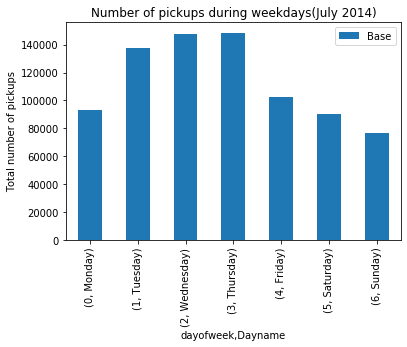

In [50]:
jul_data=pd.read_csv('uber-raw-data-jul14.csv')
print(jul_data.head(5))
jul_data['Date/Time']=pd.to_datetime(jul_data['Date/Time'],format='%m/%d/%Y %H:%M:%S')
jul_data['dayofweek']=jul_data['Date/Time'].dt.dayofweek
jul_data['Dayname']=jul_data["Date/Time"].dt.weekday_name
jul_data['Hours']=jul_data['Date/Time'].dt.hour
print(jul_data.head(5))
weekdays_jul=jul_data.pivot_table(index=['dayofweek','Dayname'],values='Base',aggfunc='count')
print(weekdays_jul.head(5))
jul_maxday=weekdays_jul[weekdays_jul['Base']==weekdays_jul['Base'].max()]
print(jul_maxday)
weekdays_jul.plot(kind='bar')
plt.ylabel('Total number of pickups')
plt.title('Number of pickups during weekdays(July 2014)')

          Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
3  8/1/2014 0:12:00  40.7387 -73.9856  B02512
4  8/1/2014 0:12:00  40.7323 -74.0077  B02512
            Date/Time      Lat      Lon    Base  dayofweek Dayname  Hours
0 2014-08-01 00:03:00  40.7366 -73.9906  B02512          4  Friday      0
1 2014-08-01 00:09:00  40.7260 -73.9918  B02512          4  Friday      0
2 2014-08-01 00:12:00  40.7209 -74.0507  B02512          4  Friday      0
3 2014-08-01 00:12:00  40.7387 -73.9856  B02512          4  Friday      0
4 2014-08-01 00:12:00  40.7323 -74.0077  B02512          4  Friday      0
                       Base
dayofweek Dayname          
0         Monday      91633
1         Tuesday    107124
2         Wednesday  115256
3         Thursday   124117
4         Friday     148674
                     Base
dayofweek Dayname        
4         Friday   148674


Text(0.5, 1.0, 'Number of pickups during weekdays(August 2014)')

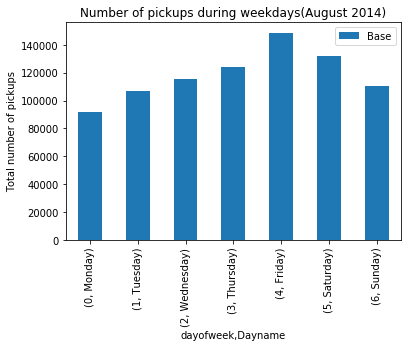

In [76]:
aug_data=pd.read_csv('uber-raw-data-aug14.csv')
print(aug_data.head(5))
aug_data['Date/Time']=pd.to_datetime(aug_data['Date/Time'],format='%m/%d/%Y %H:%M:%S')
aug_data['dayofweek']=aug_data['Date/Time'].dt.dayofweek
aug_data['Dayname']=aug_data["Date/Time"].dt.weekday_name
aug_data['Hours']=aug_data['Date/Time'].dt.hour
print(aug_data.head(5))
weekdays_aug=aug_data.pivot_table(index=['dayofweek','Dayname'],values='Base',aggfunc='count')
print(weekdays_aug.head(5))
aug_maxday=weekdays_aug[weekdays_aug['Base']==weekdays_aug['Base'].max()]
print(aug_maxday)
weekdays_aug.plot(kind='bar')
plt.ylabel('Total number of pickups')
plt.title('Number of pickups during weekdays(August 2014)')

In [78]:
pivot1=pd.merge(weekdays_apr,weekdays_may,'left',on=["dayofweek","Dayname"])
pivot2=pd.merge(pivot1,weekdays_jun,'left',on=["dayofweek","Dayname"])
pivot3=pd.merge(pivot2,weekdays_jul,'left',on=["dayofweek","Dayname"])
pivot4=pd.merge(pivot3,weekdays_aug,'left',on=["dayofweek","Dayname"])
pivot5=pd.merge(pivot4,weekdays_pickup,'left',on=["dayofweek","Dayname"])
print(pivot5)

                     Base_x  Base_y  Base_x  Base_y  Base_x  Base_y
dayofweek Dayname                                                  
0         Monday      60861   63846   94655   93189   91633  137288
1         Tuesday     91185   76662   88134  137454  107124  163230
2         Wednesday  108631   89857   99654  147717  115256  135373
3         Thursday    85067  128921  115325  148439  124117  153276
4         Friday      90303  133991  105056  102735  148674  160380
5         Saturday    77218  102990   81364   90260  132225  162057
6         Sunday      51251   56168   79656   76327  110246  116532


In [80]:
pivot5.columns=['April','May','June','July','August','September']
print(pivot5)

                      April     May    June    July  August  September
dayofweek Dayname                                                     
0         Monday      60861   63846   94655   93189   91633     137288
1         Tuesday     91185   76662   88134  137454  107124     163230
2         Wednesday  108631   89857   99654  147717  115256     135373
3         Thursday    85067  128921  115325  148439  124117     153276
4         Friday      90303  133991  105056  102735  148674     160380
5         Saturday    77218  102990   81364   90260  132225     162057
6         Sunday      51251   56168   79656   76327  110246     116532


In [91]:
#maximum from each month
maxval=pivot5.max(axis=0)
print(maxval)
index_val=pivot5.idxmax(axis=0)
print(index_val)

April        108631
May          133991
June         115325
July         148439
August       148674
September    163230
dtype: int64
April        (2, Wednesday)
May             (4, Friday)
June          (3, Thursday)
July          (3, Thursday)
August          (4, Friday)
September      (1, Tuesday)
dtype: object


In [97]:
max_table=pd.concat([index_val,maxval],axis=1)
max_table.columns=['Days','Pickups']
print(max_table)

                     Days  Pickups
April      (2, Wednesday)   108631
May           (4, Friday)   133991
June        (3, Thursday)   115325
July        (3, Thursday)   148439
August        (4, Friday)   148674
September    (1, Tuesday)   163230
